In [1]:
#pip install seaborn

In [2]:
#num_of_apps_in_each_genre
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings



In [3]:
# Read in the CSV as a DataFrame
AppStore_df = pd.read_csv('C:\\Users\\ismailKocabey\\Documents\\Lessons\\Data_Science\\DataCamap_Works\\AppleStore.csv')

# Print the first five rows of the DataFrame
print(AppStore_df)

      Unnamed: 0          id  \
0              1   281656475   
1              2   281796108   
2              3   281940292   
3              4   282614216   
4              5   282935706   
...          ...         ...   
7192       11081  1187617475   
7193       11082  1187682390   
7194       11087  1187779532   
7195       11089  1187838770   
7196       11097  1188375727   

                                             track_name  size_bytes currency  \
0                                       PAC-MAN Premium   100788224      USD   
1                             Evernote - stay organized   158578688      USD   
2       WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3     eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                                 Bible    92774400      USD   
...                                                 ...         ...      ...   
7192                                              Kubik

In [4]:
#şimdi cont_rating kolonundaki + sembollerini silelim.
#silinecek karakterlerin listesi.
Chars_To_Remove=['+']
#Temizlenecek kolonların listesi
Cols_To_Clean=['cont_rating']

for col in Cols_To_Clean:
    for char in Chars_To_Remove:
        AppStore_df[col]=AppStore_df[col].apply(lambda x:x.replace(char,''))
             
print(AppStore_df.head())

   Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5  

In [5]:
#şimdide bazı kolnların tiplerini değiştirelim.
AppStore_df['user_rating_ver']=AppStore_df['user_rating_ver'].astype(float)
#AppStore_df['ver']=AppStore_df['ver'].astype(float)
print(AppStore_df)


      Unnamed: 0          id  \
0              1   281656475   
1              2   281796108   
2              3   281940292   
3              4   282614216   
4              5   282935706   
...          ...         ...   
7192       11081  1187617475   
7193       11082  1187682390   
7194       11087  1187779532   
7195       11089  1187838770   
7196       11097  1188375727   

                                             track_name  size_bytes currency  \
0                                       PAC-MAN Premium   100788224      USD   
1                             Evernote - stay organized   158578688      USD   
2       WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3     eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                                 Bible    92774400      USD   
...                                                 ...         ...      ...   
7192                                              Kubik

In [6]:
#Şimdi türlere türlere göre appların sayısını alalım ve grafiksel olarak çizelim
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#ilk olarak toplam kategori sayısını alalım.
num_of_genre=len(AppStore_df['prime_genre'].unique())
print("Tür sayısı : ",num_of_genre)

#Şimdide her kategoriye ait kaç tane  app var onların sayısını alalım.
num_of_apps_in_each_genre=AppStore_df['prime_genre'].value_counts()

#Şimdi azalan bir şekilde ile listeleyelim
sorted_num_of_apps_in_each_genre=num_of_apps_in_each_genre.sort_values(ascending=False)
print(sorted_num_of_apps_in_each_genre)

data = [go.Bar(
        x = num_of_apps_in_each_genre.index, # index = category name
        y = num_of_apps_in_each_genre.values, # value = count
)]

plotly.offline.iplot(data)

Tür sayısı :  23
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64


In [7]:
#Şimdi rating lerin ortalamasın alıp grafiğini çizdirelim.
avg_app_rating=AppStore_df['cont_rating'].mean()
print('Average app rating',avg_app_rating)

#Şimdi de raitng ortalamasını diğer rating lere göre dağılımını inceleyelim
data=[go.Histogram(x=AppStore_df['cont_rating'])]

layout={'shapes':[{
    'type':'line',
    'x0':avg_app_rating,
    'y0':0,
    'x1':avg_app_rating,
    'y1':1000,
    'line':{'dash':'dashdot'}
}]}

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating inf


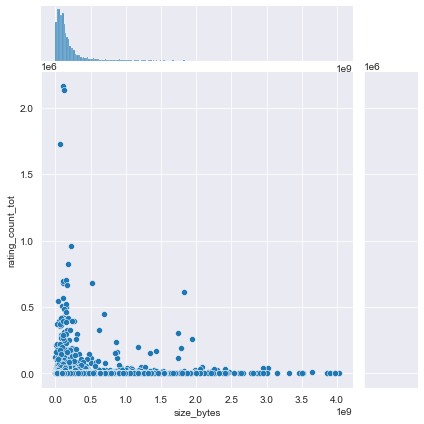

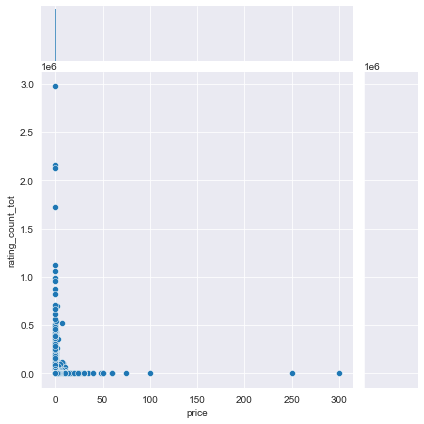

In [8]:
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
apps_with_size_and_rating_present=AppStore_df[(~AppStore_df['rating_count_tot'].isnull()) & 
                                              (~AppStore_df['size_bytes'].isnull())]

large_categories=apps_with_size_and_rating_present.groupby('prime_genre').filter(lambda x:len(x)>=250)

plt1=sns.jointplot(x=large_categories['size_bytes'],y=large_categories['rating_count_tot'])

usd_apps=apps_with_size_and_rating_present[apps_with_size_and_rating_present['currency']=='USD']

plt2=sns.jointplot(x=usd_apps['price'],y=usd_apps['rating_count_tot'])


,prime_genre,track_name,price
115,Education,Proloquo2Go - Symbol-based AAC,249.99
1479,Education,LAMP Words For Life,299.99


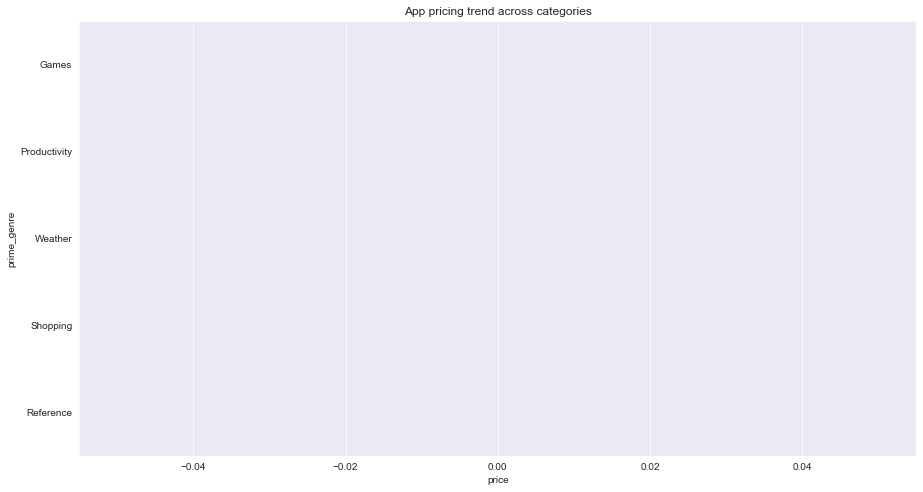

In [9]:
#Şimdi categori ile ücretleri arasındaki ilişkiyi inceleyelim
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
fig.set_size_inches(15,8)

#birkaç popüler kategori seçelim
popular_apps_cats=AppStore_df[AppStore_df.isin(['Games','Productivity','Weather','Shopping','Reference'])]

#şimdi fiyat ve kategorie göre inceleyelim
ax=sns.stripplot(x=popular_apps_cats['price'],y=popular_apps_cats['prime_genre'], jitter=True,linewidth=1)
ax.set_title('App pricing trend across categories')

#şimdi fiyatı  200 den büyük olanları seçelim
apps_greather_200=AppStore_df[AppStore_df['price']>200]
apps_greather_200[['prime_genre','track_name','price']]